Kümeleme, benzer varlıkları özelliklerine göre kümeler halinde gruplandırmak için bir model eğittiğiniz denetimsiz bir makine öğrenimi tekniğidir.

Bu alıştırmada, üç sayısal özellikten (A, B ve C) oluşan bir veri setini kümelere ayırmalısınız. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("clusters.csv")
df.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


## PCA

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
scaled_features = MinMaxScaler().fit_transform(df)

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

## Kümelenmemiş veri noktalarını görselleştirme

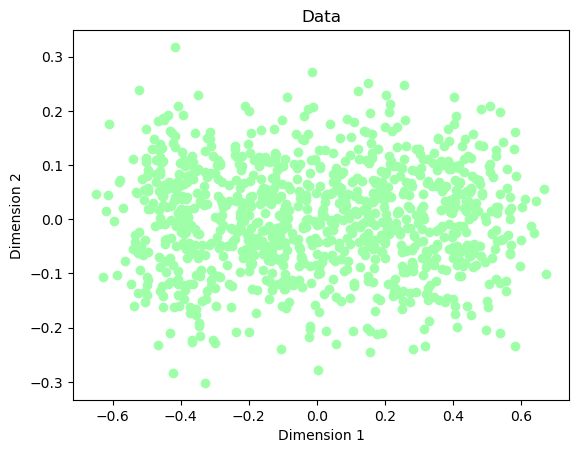

In [5]:
plt.scatter(features_2d[:,0], features_2d[:,1], color="#9fffa8")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Data")
plt.show()

## WCSS

In [6]:
from sklearn.cluster import KMeans

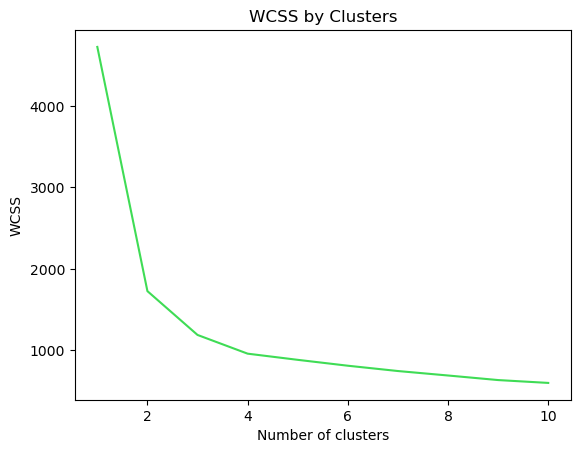

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color="#3fdc55")
plt.title("WCSS by Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## K-Means

In [8]:
model = KMeans(n_clusters=4, init="k-means++", n_init=500, max_iter=1500)

km_clusters = model.fit_predict(df)

In [9]:
def plot_clusters(samples, clusters):
    col_dic = {0 : "#866d1e", 1 : "#403aea", 2 : "#7d9a58", 3 : "#421d0b"}
    mrk_dic = {0 : "*", 1 : "o", 2 : "+", 3 : "p"}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Assignments")
    plt.show()    

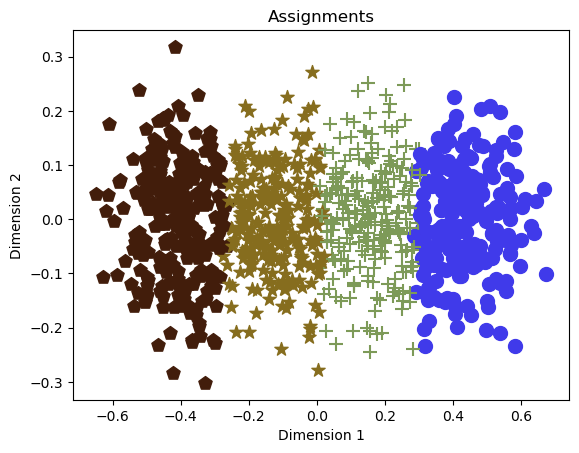

In [10]:
plot_clusters(features_2d, km_clusters)

## Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(df)

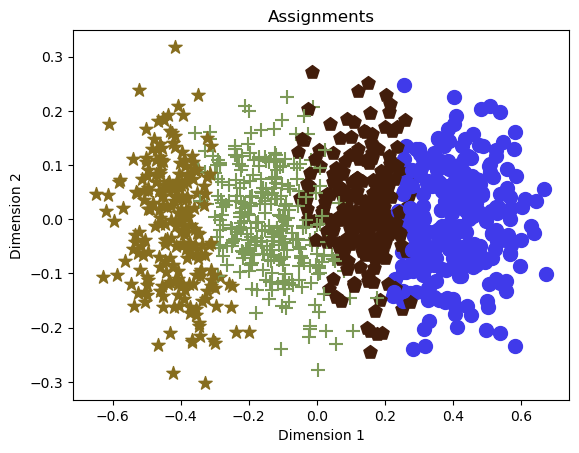

In [13]:
plot_clusters(features_2d, agg_clusters)